# Wavelet study
Wavelet transform can obtain a two dimensional representation of the periodic signal with simutaneous localization in time and frequency space domains.<br>
Wavelet transform of a given signal $\chi(k)$ is defined as:
$$w(a,b)=\sqrt{a}\int^{+\infty}_{-\infty} \chi(k)\phi(a(k-b))dk$$
where $\phi$ is a wavelet function, and $a$ and $b$ are the scale and translation parameters, respectively.<br>

Applications:
  * The reconstruction of **radial distruction function** from noisy EXAFS signals of copper has been performed in [3] based on the wavelet Galerkin regularization(use Daubechies-type wavelet).
  * **identification of overlapping contributions**, in particular, coming from neighboring atoms of different type of scattering events of different order such as single and multiple-scattering.
    * Wavelet:
      * continuous Cauchy WT wavelet[6,9-11]
      * Morlet WT wavelet[7,12,14]
      * FEFF-Morlet wavelet[13]
        * take into account the scattering properties of the atoms as computed within the FEFF formalism[15] and provides better discrimination of different atoms at similar distances than the Morlet wavelet[13].

  



In [2]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install pywt
!pip install pandas
!pip install xraylarch

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   --------- ------------------------------ 3.7/15.8 MB 19.8 MB/s eta 0:00:01
   ----------------------- ---------------- 9.2/15.8 MB 23.8 MB/s eta 0:00:01
   ----------------------------------- ---- 14.2/15.8 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 15.8/15.8 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wxmplot 0.0.0 requires wxutils>=0.3.0, but you have wxutils 0.0.0 which is incompatible.


In [1]:
import numpy as np
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import plotly.express as px 
import pywt
from scipy.fft import fft, ifft,fftfreq,fftshift

In [3]:
%matplotlib widget

# Beginning: decomposation of a signal
$$\chi(x)=sin(4x)e^{-(x-5)^2}sin(8x)e^{-(x-10)^2}$$


159


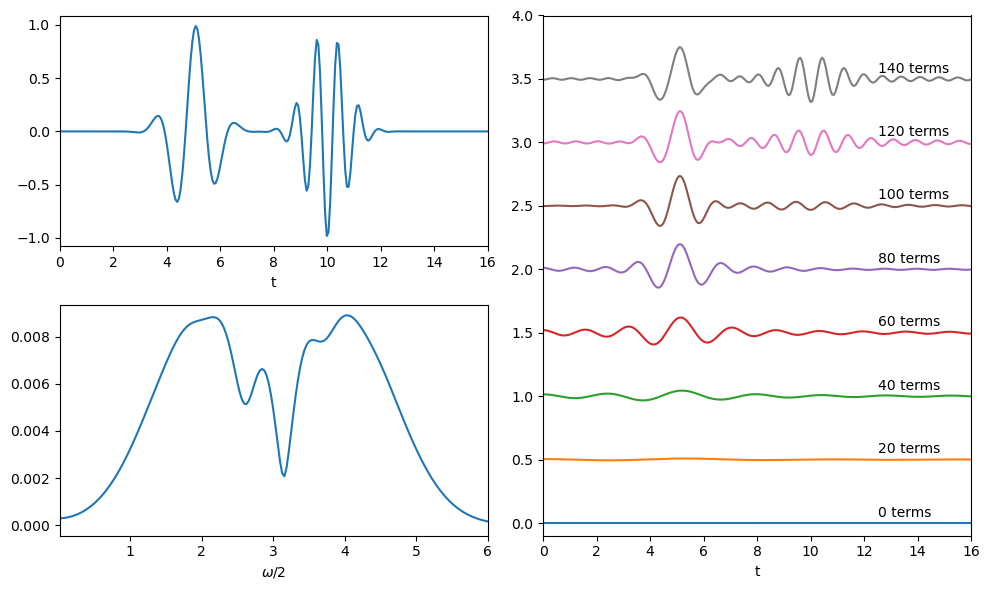

In [3]:
x=2*np.pi*np.arange(0,16,0.01)
chi1=np.sin(4*x)*np.exp(-(x-5)**2)+np.sin(8*x)*np.exp(-(x-10)**2)
f_f=fft(chi1,1600)

f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)

yplot = fftshift(f_f)

fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,2,1)
ax1.plot(x,chi1)
ax1.set_xlim(0,16)
ax1.set_xlabel('t')

ax2=fig.add_subplot(2,2,3)
ax2.plot(f_f_freq/2,np.abs(yplot)*1/len(x))
ax2.set_xlabel('$\omega$/2')
#ax[1].set_ylim([0.01,1])
ax2.set_xlim([0.01,6])

ax3=fig.add_subplot(1,2,2)
freq=f_f_freq
freq=f_f_freq[(f_f_freq<10)&(f_f_freq>0)]
indices=np.where((f_f_freq<10)&(f_f_freq>0))
A=np.real(yplot)
A=A[indices]
print(len(A))
num=0
f_series=np.zeros(len(x))
for i in range(0,len(freq)):
    f_series+=(A[i]/len(x))*np.cos(freq[i]*x)
    if i%20==0:
        ax3.plot(x,f_series+0.5*num)
        ax3.text(12.5,0.5*num+0.05,f'{num*20} terms')
        num+=1
#ax3.plot(x,np.cos(freq[0]*x))
ax3.set_xlim(0,16)
ax3.set_ylim(-0.1,4)
ax3.set_xlabel('t')
fig.tight_layout()

## 1. Some mother wavelets

### 1.1 Morlet wavelet

$\phi(t)=exp(i\omega_0t)exp(-\sigma^2_0t^2)$ in paper[1].<br>
$\sigma_0$ equals always to 1 $\AA$<br>
* The Morlet wavelet in the pywavelets package:
   - Morlet wavelet<br>
    $$\phi(t) = e^{-\frac{t^2}{2}}cos(5t)$$
   - Complex Morlet Wavelet<br>
   $$\phi(t) = \frac{1}{\sqrt{\pi B}}exp^{-\frac{t^2}{B}}exp^{i2\pi Ct}$$
   where B is the **Bandwidth**, C is the **center frequency**.

**<span style="color:yellow">remember always a</span> $\color{yellow}{2\pi}$ <span style="color:yellow">in the cosine, sine function, so we need to sample with</span> $\color{yellow}{2\pi.}$**




1024
Sampling rate:0.01564027370478982.
1024
Sampling rate:0.01564027370478982.
1024
Sampling rate:0.01564027370478982.


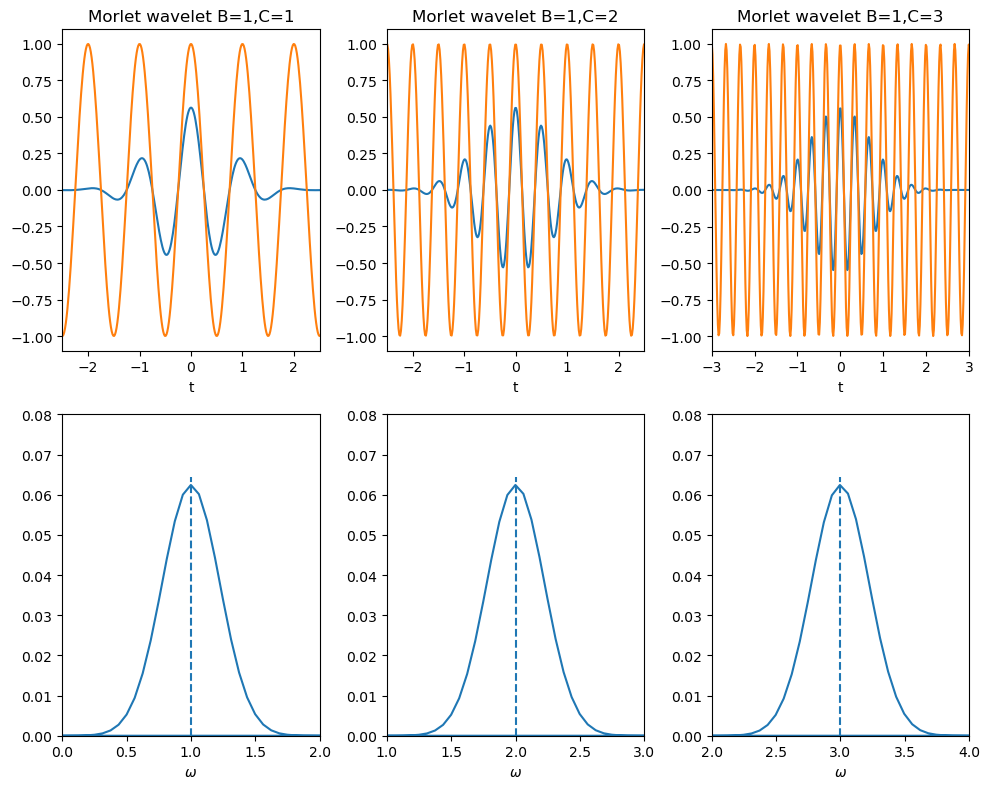

In [4]:
fig=plt.figure(figsize=(10,8))
x=np.linspace(-8,8,1000)
wav=pywt.ContinuousWavelet('cmor1-1')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(231)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-2.5,2.5)
ax.set_title('Morlet wavelet B=1,C=1')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(234)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(1,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(0,2)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")


wav=pywt.ContinuousWavelet('cmor1-2')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(232)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*2*x))
ax.set_xlabel("t")
ax.set_xlim(-2.5,2.5)
ax.set_title('Morlet wavelet B=1,C=2')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(235)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(2,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(1,3)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")



wav=pywt.ContinuousWavelet('cmor1-3')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(233)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*3*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-3,3)
ax.set_title('Morlet wavelet B=1,C=3')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(236)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(3,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(2,4)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")


1024
Sampling rate:0.01564027370478982.
1024
Sampling rate:0.01564027370478982.
1024
Sampling rate:0.01564027370478982.
cmor3-1 bandwidth:1.2487792968750009
cmor3-1 bandwidth:8.304985337243401


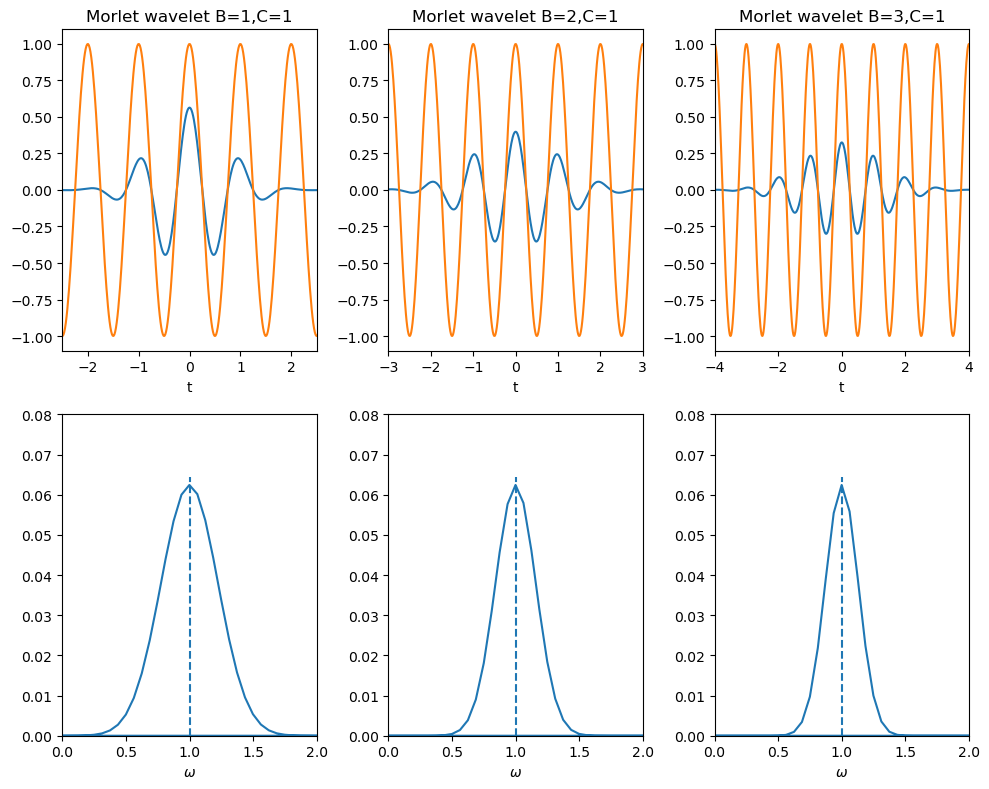

In [5]:
half_height=0.062/2
fig=plt.figure(figsize=(10,8))
x=np.linspace(-8,8,1000)
wav=pywt.ContinuousWavelet('cmor1-1')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(231)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-2.5,2.5)
ax.set_title('Morlet wavelet B=1,C=1')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
half_height=np.max(np.abs(f_f)*1/len(x))/2
print(len(f_f_freq))
ax=fig.add_subplot(234)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(1,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(0,2)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")


wav=pywt.ContinuousWavelet('cmor2-1')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(232)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-3,3)
ax.set_title('Morlet wavelet B=2,C=1')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(235)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(1,0,0.0643,linestyles='dashed',label='center frequency')

ax.set_xlabel('$\omega$')
ax.set_xlim(0,2)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")



wav=pywt.ContinuousWavelet('cmor3-1')
[phi, x]=wav.wavefun(level=10)
ax=fig.add_subplot(233)
ax.plot(x,np.real(phi))
ax.plot(x,np.cos(2*np.pi*x))
ax.set_xlabel("t")
ax.set_xlim(-4,4)
ax.set_title('Morlet wavelet B=3,C=1')

f_f=fft(phi,len(x))
sampling_ratio=x[3]-x[2]
f_f_freq=fftfreq(len(x),sampling_ratio)
print(len(f_f_freq))
ax=fig.add_subplot(236)
ax.plot(f_f_freq,np.abs(f_f)*1/len(x))
ax.vlines(1,0,0.0643,linestyles='dashed',label='center frequency')
ax.set_xlabel('$\omega$')
ax.set_xlim(0,2)
ax.set_ylim(0,0.08)
plt.tight_layout()
# len(wav.wavefun(level=10)[1])
print(f"Sampling rate:{x[3]-x[2]}.")

index=np.where(np.round(np.real(f_f),3)!=0)
real_freq=f_f_freq[index]
bandwidth=real_freq[-1]-real_freq[0]
print(f'cmor3-1 bandwidth:{bandwidth}')
index_x=np.where((np.round(np.real(phi),3)!=0)&(np.round(np.real(phi),3)>0))
real_x=x[index_x]
bandwidth_x=real_x[-1]-real_x[0]
print(f'cmor3-1 bandwidth:{bandwidth_x}')

Continuous wavelet will be evaluated over the range [-8.0, 8.0]


Text(0.5, 1.0, '|FFT(filter)|$^2$')

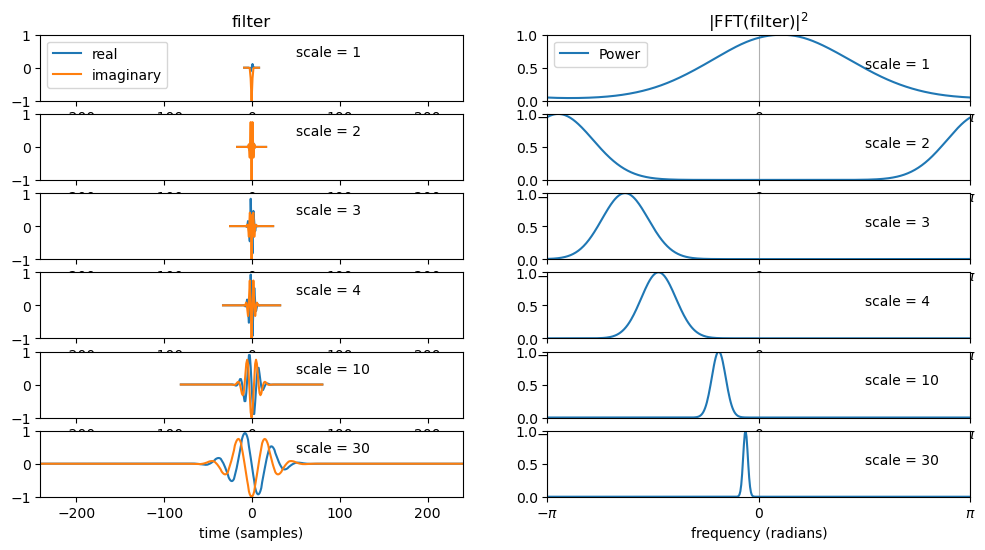

In [6]:
wav=pywt.ContinuousWavelet('cmor1-1')
print("Continuous wavelet will be evaluated over the range [{}, {}]".format(
    wav.lower_bound, wav.upper_bound))

width = wav.upper_bound - wav.lower_bound

scales = [1, 2, 3, 4, 10, 30]

max_len = int(np.max(scales)*width + 1)
t = np.arange(max_len)
fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
for n, scale in enumerate(scales):
    # The following code is adapted from the internals of cwt
    int_psi, x = pywt.integrate_wavelet(wav, precision=10)
    step = x[1] - x[0]
    j = np.floor(
        np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    j = j.astype(np.int_)

    # normalize int_psi for easier plotting
    int_psi /= np.abs(int_psi).max()

    # discrete samples of the integrated wavelet
    filt = int_psi[j][::-1]

    # The CWT consists of convolution of filt with the signal at this scale
    # Here we plot this discrete convolution kernel at each scale.

    nt = len(filt)
    t = np.linspace(-nt//2, nt//2, nt)
    axes[n, 0].plot(t, filt.real, t, filt.imag)
    axes[n, 0].set_xlim([-max_len//2, max_len//2])
    axes[n, 0].set_ylim([-1, 1])
    axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))

    f = np.linspace(-np.pi, np.pi, max_len)
    filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
    filt_fft /= np.abs(filt_fft).max()
    axes[n, 1].plot(f, np.abs(filt_fft)**2)
    axes[n, 1].set_xlim([-np.pi, np.pi])
    axes[n, 1].set_ylim([0, 1])
    axes[n, 1].set_xticks([-np.pi, 0, np.pi])
    axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    axes[n, 1].grid(True, axis='x')
    axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))

axes[n, 0].set_xlabel('time (samples)')
axes[n, 1].set_xlabel('frequency (radians)')
axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
axes[0, 1].legend(['Power'], loc='upper left')
axes[0, 0].set_title('filter')
axes[0, 1].set_title(r'|FFT(filter)|$^2$')
# plt.tight_layout()

In [7]:
len(chi1)

1600

In [8]:
wav=pywt.ContinuousWavelet('cmor6-1')
print("Continuous wavelet will be evaluated over the range [{}, {}]".format(
    wav.lower_bound, wav.upper_bound))

Continuous wavelet will be evaluated over the range [-8.0, 8.0]


## 1.2 One example of Fourier transform and wavelet transform
<ins>**Function**</ins>:
$$\chi(x)=sin(4x)e^{-(x-5)^2}sin(8x)e^{-(x-10)^2}$$

d:\mamba\envs\NN_works\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\mamba\envs\NN_works\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


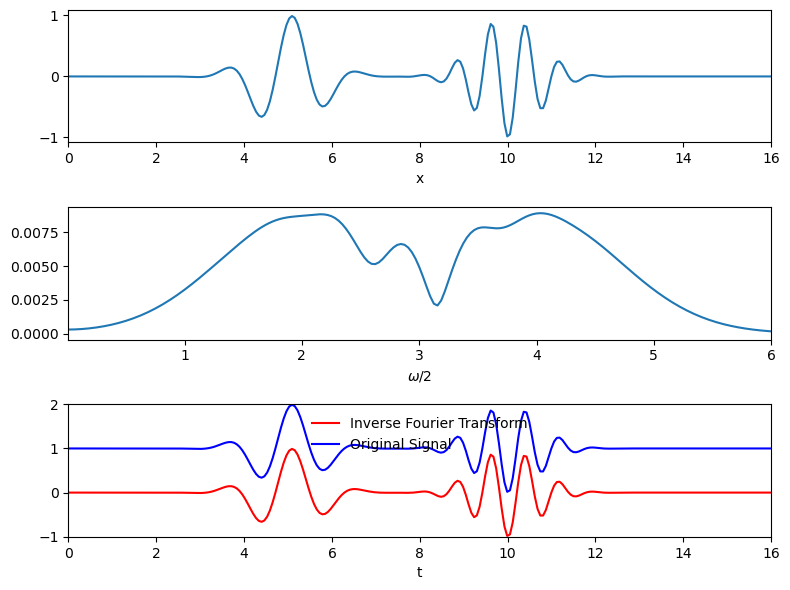

In [9]:
from scipy.fft import fft, ifft,fftfreq,fftshift
x=2*np.pi*np.arange(0,16,0.01)
chi1=np.sin(4*x)*np.exp(-(x-5)**2)+np.sin(8*x)*np.exp(-(x-10)**2)
f_f=fft(chi1,1600)

f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
fig,ax=plt.subplots(3,1,figsize=(8,6))
ax[1].plot(f_f_freq/2,np.abs(yplot)*1/len(x))
ax[1].set_xlabel('$\omega$/2')
#ax[1].set_ylim([0.01,1])
ax[1].set_xlim([0.01,6])
ax[0].plot(x,chi1)
ax[0].set_xlim(0,16)
ax[0].set_xlabel('x')
f_f_back=ifft(f_f)
ax[2].plot(x,f_f_back,'r',label="Inverse Fourier Transform")
ax[2].plot(x,chi1+1,'b',label="Original Signal")
ax[2].set_ylim(-1,2)
ax[2].set_xlim(0,16)
ax[2].legend(frameon=False)
ax[2].set_xlabel('t')
plt.tight_layout()
plt.show()

d:\mamba\envs\NN_works\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\mamba\envs\NN_works\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


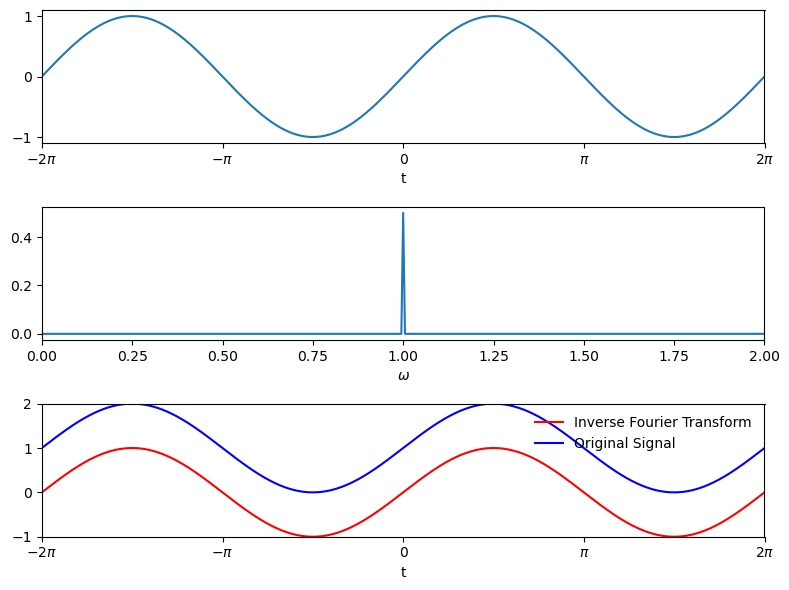

In [10]:
#super simple case: A sin function
from scipy.fft import fft, ifft,fftfreq,fftshift
x=2*np.pi*np.arange(-100,100,0.001)
chi1=np.sin(x)
f_f=fft(chi1)

f_f_freq=fftfreq(len(chi1),d=0.001)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
fig,ax=plt.subplots(3,1,figsize=(8,6))
ax[1].plot(f_f_freq,np.abs(yplot)*1/len(x))
ax[1].set_xlabel('$\omega$')
#ax[1].set_ylim([0.01,1])
ax[1].set_xlim([0,2])
ax[0].plot(x,chi1)
ax[0].set_xlabel('t')
ax[0].set_xlim(-2*np.pi,2*np.pi)
ax[0].set_xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],['$-2\pi$','$-\pi$','0','$\pi$','$2\pi$'])
f_f_back=ifft(f_f)
ax[2].plot(x,f_f_back,'r',label="Inverse Fourier Transform")
ax[2].plot(x,chi1+1,'b',label="Original Signal")
ax[2].set_ylim(-1,2)
ax[2].set_xlim(-2*np.pi,2*np.pi)
ax[2].set_xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],['$-2\pi$','$-\pi$','0','$\pi$','$2\pi$'])
ax[2].legend(frameon=False)
ax[2].set_xlabel('t')
plt.tight_layout()
plt.show()

In [11]:
np.pi/2

1.5707963267948966

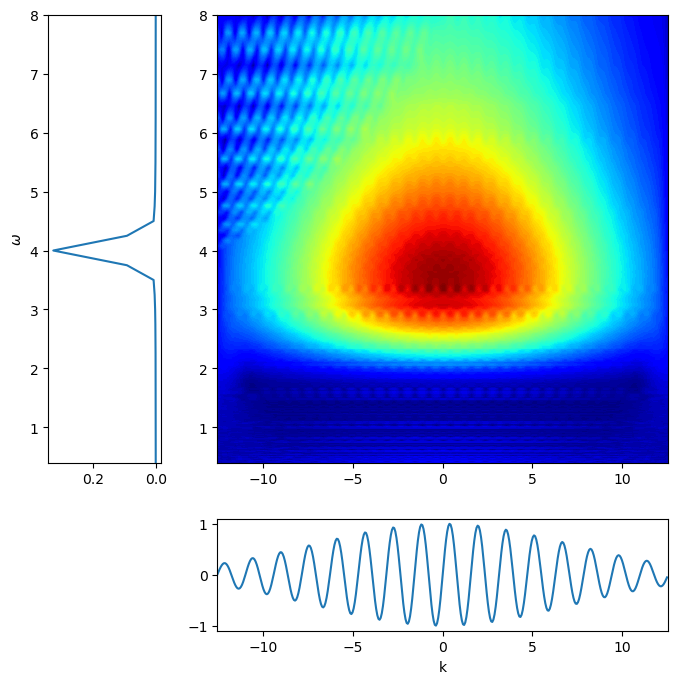

In [12]:

fig, ax = plt.subplots(2,2, figsize=(8,8), gridspec_kw={'width_ratios': [1, 4],'height_ratios': [4, 1]})
x=2*np.pi*np.arange(-2,2,0.01)

chi1=np.sin(4*x)*np.exp(-x**2/100)
#fourier transform
f_f=fft(chi1)
f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
#wavelet transform
coef,freqs = pywt.cwt(chi1,np.arange(1,1000), 'cmor0.05-2',method='conv',sampling_period=0.01)

X, Y =np.meshgrid(x,freqs)
coef=np.abs(coef)
ax[0,1].contourf(X, Y,coef,cmap='jet',levels=100, vmax=coef.max(), vmin=-coef.min())#,vmin=a0bs(coef).min(),vmax=abs(coef).max())
ax[0,1].set_ylim(0.4,8)
ax[0,1].set_xlim(-4*np.pi,4*np.pi)
ax[0,0].plot(np.abs(yplot)*1/len(x),f_f_freq, label='FFT')
# ax[0,0].plot(np.abs(f_f),f_f_freq)
#ax[0,0].set_xlim(0,0.008)
#ax[0,0].set_ylim(0.01,6)
ax[0,0].invert_xaxis()
ax[0,0].set_ylabel('$\omega$')
ax[0,0].sharey(ax[0,1])
ax[1,1].plot(x,chi1)
ax[1,1].set_xlabel('k')
ax[1,1].sharex(ax[0,1])

#change the subplot to axR
ax[1,0].remove()
plt.show()

#axR = ax.twinx()
#axR.plot(x,chi1)


In [13]:
f1 = pywt.scale2frequency('cmor6-0.5', 1)/0.01
f2 = pywt.scale2frequency('cmor6-0.5', 1000)/0.01
print(f1,f2)


50.0 0.05


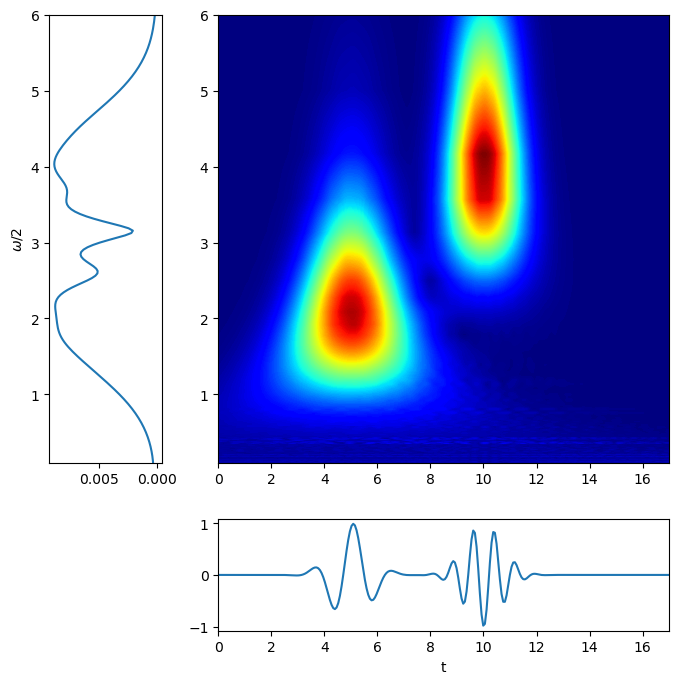

In [14]:
fig, ax = plt.subplots(2,2, figsize=(8,8), gridspec_kw={'width_ratios': [1, 4],'height_ratios': [4, 1]})
x=2*np.pi*np.arange(0,16,0.01)

chi1=np.sin(4*x)*np.exp(-(x-5)**2)+np.sin(8*x)*np.exp(-(x-10)**2)
#fourier transform
f_f=fft(chi1,1600)
f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
#wavelet transform
coef,freqs = pywt.cwt(chi1,np.arange(1,1000), 'cmor5-0.5',method='conv',sampling_period=0.01)

X, Y =np.meshgrid(x,freqs)
coef=np.abs(coef)
ax[0,1].contourf(X, Y/2,coef,cmap='jet',levels=200, vmax=abs(coef).max(), vmin=-abs(coef).min())#,vmin=a0bs(coef).min(),vmax=abs(coef).max())
ax[0,1].set_ylim(0.1,6)
ax[0,1].set_xlim(0,17)
ax[0,0].plot(np.abs(yplot)*1/len(x),f_f_freq/2, label='FFT')
# ax[0,0].plot(np.abs(f_f),f_f_freq)
#ax[0,0].set_xlim(0,0.008)
#ax[0,0].set_ylim(0.01,6)
ax[0,0].invert_xaxis()
ax[0,0].set_ylabel('$\omega/2$')
ax[0,0].sharey(ax[0,1])
ax[1,1].plot(x,chi1)
ax[1,1].set_xlabel('t')
ax[1,1].sharex(ax[0,1])

#change the subplot to axR
ax[1,0].remove()
plt.show()

#axR = ax.twinx()
#axR.plot(x,chi1)


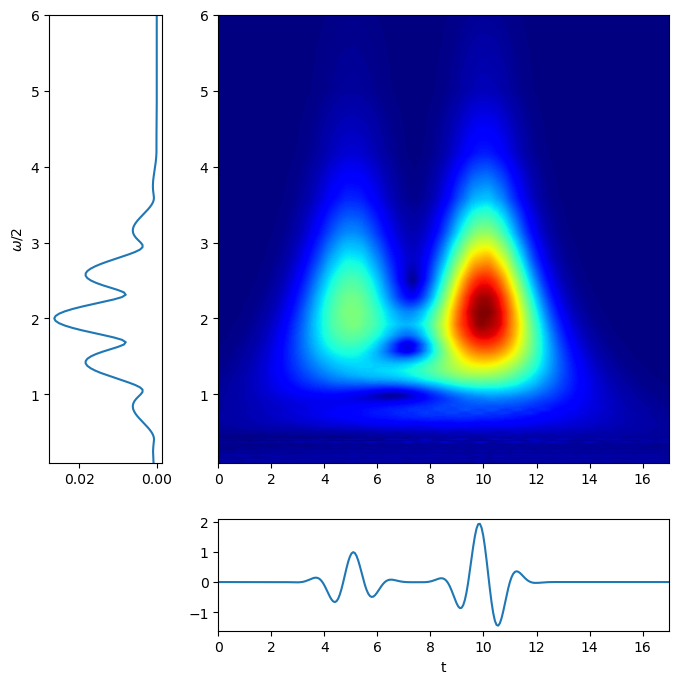

In [15]:
fig, ax = plt.subplots(2,2, figsize=(8,8), gridspec_kw={'width_ratios': [1, 4],'height_ratios': [4, 1]})
x=2*np.pi*np.arange(0,16,0.01)

chi1=np.sin(4*x)*np.exp(-(x-5)**2)+2*np.sin(4*x)*np.exp(-(x-10)**2)
#fourier transform
f_f=fft(chi1,1600)
f_f_freq=fftfreq(len(chi1),d=0.01)
f_f_freq= fftshift(f_f_freq)
yplot = fftshift(f_f)
#wavelet transform
coef,freqs = pywt.cwt(chi1,np.arange(1,1000), 'cmor5-0.5',method='conv',sampling_period=0.01)

X, Y =np.meshgrid(x,freqs)
coef=np.abs(coef)
ax[0,1].contourf(X, Y/2,coef,cmap='jet',levels=200, vmax=abs(coef).max(), vmin=-abs(coef).min())#,vmin=a0bs(coef).min(),vmax=abs(coef).max())
ax[0,1].set_ylim(0.1,6)
ax[0,1].set_xlim(0,17)
ax[0,0].plot(np.abs(yplot)*1/len(x),f_f_freq/2, label='FFT')
# ax[0,0].plot(np.abs(f_f),f_f_freq)
#ax[0,0].set_xlim(0,0.008)
#ax[0,0].set_ylim(0.01,6)
ax[0,0].invert_xaxis()
ax[0,0].set_ylabel('$\omega/2$')
ax[0,0].sharey(ax[0,1])
ax[1,1].plot(x,chi1)
ax[1,1].set_xlabel('t')
ax[1,1].sharex(ax[0,1])

#change the subplot to axR
ax[1,0].remove()
plt.show()

#axR = ax.twinx()
#axR.plot(x,chi1)


# real wavelet transform on X-ray absorption spectra

In [17]:
import larch
from wxmplot.interactive import plot
from larch.xafs import autobk
from larch.xafs import cauchy_wavelet
from larch.io import read_ascii,read_athena
from larch.xafs import find_e0,pre_edge,autobk,xftf,xftr
from larch import Group
import larch
import glob
import os
import glob,linecache,shutil
import numpy as np
# import xarray as xr

from copy import deepcopy
import datetime
import json

import os
import matplotlib.pyplot as plt
import pymatgen
from pymatgen.core import Lattice, Structure
from matplotlib import rc
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [18]:
expdata=np.loadtxt('Ni_norm.nor.chik')
expdata=Group(k=expdata[:,0],chi=expdata[:,1])
xftf(expdata.k, expdata.chi, kmin=1, kmax=8, dk=2, window='hanning',
     kweight=2, group=expdata)
k2chi=expdata.k*expdata.k*expdata.chi
kwinmax=np.max(expdata.kwin)
kmax=np.max(k2chi)

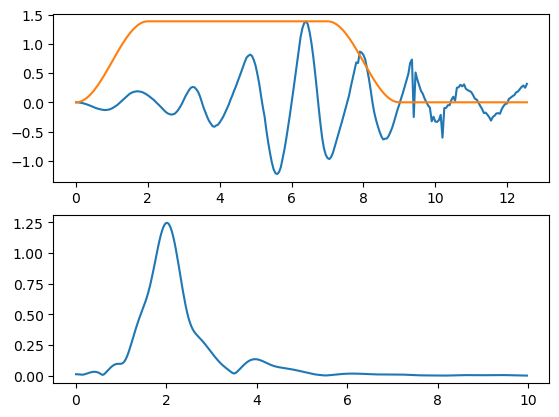

In [19]:
fig,ax=plt.subplots(2,1)
ax[0].plot(expdata.k,expdata.k*expdata.k*expdata.chi)
ax[0].plot(expdata.k,expdata.kwin*kmax/kwinmax)
ax[1].plot(expdata.r,expdata.chir_mag)

In [20]:
from larch import Group, Journal
from larch import Make_CallArgs, parse_group_args
# def set_xafsGroup(group, _larch=None):

#     """set _sys.xafsGroup to the s<upplied group (if not None)

#     return _sys.xafsGroup.

#     if needed, a new, empty _sys.xafsGroup may be created.
#     """
#     if group is None:
#         if _larch is None:
#             group = Group()
#         else:
#             group = getattr(_larch.symtable._sys, 'xafsGroup', Group())
#     if not hasattr(group, 'journal'):
#         group.journal = Journal()

#     if _larch is not None:
#         _larch.symtable._sys.xafsGroup = group
#     return group

# def morlet_wavelet(k, chi=None, group=None, kweight=0, rmax_out=10,
#                    nfft=2048, _larch=None):
#     kstep = np.round(1000.*(k[1]-k[0]))/1000.0
#     rmin = 1.e-7
#     rmax = rmax_out
#     rstep = (np.pi/2048)/kstep
#     nrpts = int(np.round((rmax-rmin)/rstep))
#     nkout = len(k)
#     kstep = np.round(1000.*(k[1]-k[0]))/1000.0
#     if kweight != 0:
#         chi = chi * k**kweight
#     NFT = int(nfft/2)
#     if len(k) < NFT:
#         knew = np.arange(NFT) * kstep
#         xnew = np.zeros(NFT) * kstep
#         xnew[:len(k)] = chi
#     else:
#         knew = k[:NFT]
#         xnew = chi[:NFT]

#     # FT parameters
#     freq = (1.0/kstep)*np.arange(nfft)/(2*nfft)
#     omega = 2*np.fft.fft(xnew,n=2*nfft)
#     r  = np.linspace(0, rmax, nrpts)
#     coef,freqs = pywt.cwt(xnew,np.arange(1,nrpts), 'cmor5-0.5',method='conv',sampling_period=0.01)
#     coef_m=np.abs(coef)
    
#     group = set_xafsGroup(group, _larch=_larch)
#     group.wcauchy_r  =  r
#     group.wcauchy    =  freqs
#     group.wcauchy_mag = coef_m
#     group.wcauchy_re=coef.real
#     group.wcauchy_im=coef.imag

def wavelet_transform(group,kmin=0,kmax=20,rmin=0,rmax=20,kweight=0,rweight=0,dk=1,dr=0,windows='hanning',original=True):
     xftf(group.k,group.chi, kmin=kmin, kmax=kmax, dk=dk, window=windows,
          kweight=kweight, group=group)
     xftr(group.r,group.chir, rmin=rmin, rmax=rmax, dr=dr, window=windows,group=group)
     fig, ax = plt.subplots(2,2, figsize=(8,8), gridspec_kw={'width_ratios': [1, 4],'height_ratios': [4, 1]})
     k2chi=group.k*group.k*group.chi
     #morlet_wavelet(k=group.q,chi=group.chiq,group=group,kweight=0)
     if original==True:
         X, Y =np.meshgrid(group.k, group.r)
         cauchy_wavelet(k=group.k,chi=k2chi,group=group)
     else:
         X, Y =np.meshgrid(group.q, group.r)
         cauchy_wavelet(k=group.q,chi=group.chiq,group=group)
     
     kwinmax=np.max(group.kwin)
     kmax=np.max(k2chi)
     rwinmax=np.max(group.rwin)
     rmax=np.max(group.chir_mag)

     # ax[0,1].contourf(, Y/2,coef,cmap='jet',levels=200, vmax=abs(coef).max(), vmin=-abs(coef).min())#,vmin=a0bs(coef).min(),vmax=abs(coef).max())
     # plt.imshow(back_f.wcauchy_mag,label='Wavelet Transform: Magnitude')
     ax[0,1].contourf(X,Y,group.wcauchy_mag,cmap='jet',levels=200, vmax=abs(group.wcauchy_re).max(), vmin=-abs(group.wcauchy_re).min())#,vmin=a0bs(coef).min(),vmax=abs(coef).max())
     ax[0,0].plot(group.chir_mag,group.r)
     if original==False:
         ax[0,0].plot(group.rwin*rmax/rwinmax,expdata.r)
     # ax[0,0].invert_xaxis()
     ax[0,0].set_ylabel('r')
     ax[0,0].sharey(ax[0,1])
     ax[1,1].set_xlabel('k')
     ax[1,1].sharex(ax[0,1])
     if original==True:
         ax[1,1].plot(group.k,group.k*group.k*group.chi)
     if original==False:
         ax[1,1].plot(group.q,group.chiq)
    #  ax[1,1].plot(group.k,group.kwin*kmax/kwinmax)
     ax[0,1].set_ylim(0.1,3)
     ax[0,1].set_xlim(0,10)
     ax[1,0].remove()
    

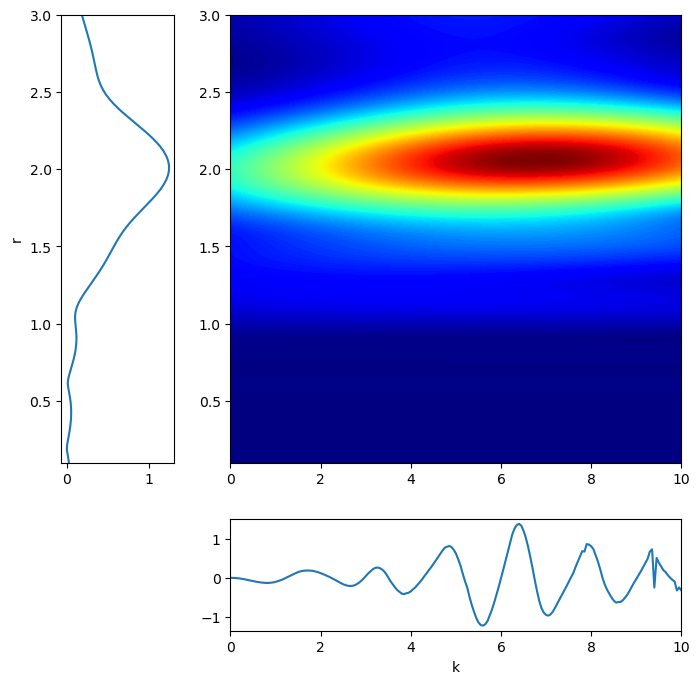

In [21]:
wavelet_transform(expdata,kmin=1,kmax=8,rmin=1,rmax=3,kweight=2,rweight=0,dk=1,dr=0,windows='hanning',original=True)

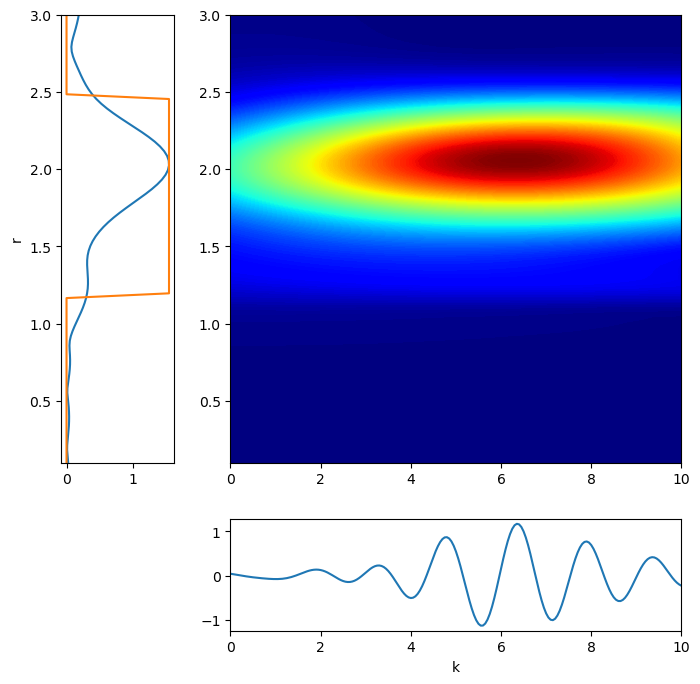

In [22]:
wavelet_transform(expdata,kmin=1,kmax=10,rmin=1.2,rmax=2.5,kweight=2,rweight=0,dk=1,dr=0,windows='hanning',original=False)

In [22]:

# morlet_wavelet(expdata.k,expdata.chi,expdata,kweight=2,rmax_out=10)
